In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scipy as sp
import seaborn as sns

from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import datetime as dt

In [2]:
# feature selectors
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_regression, RFECV
from sklearn.linear_model import LinearRegression

In [3]:
# loading datasets

# Registration
vaxreg_malaysia = pd.read_csv('citf-public-main/registration/vaxreg_malaysia.csv')
vaxreg_state = pd.read_csv('citf-public-main/registration/vaxreg_state.csv')

vaxreg_malaysia['date'] = pd.to_datetime(vaxreg_malaysia['date'], errors='raise')
vaxreg_state['date'] = pd.to_datetime(vaxreg_state['date'], errors='raise')

# static
population = pd.read_csv('covid19-public-main/static/population.csv')

#vaxreg_state['date'] = pd.to_datetime(vaxreg_state['date'], errors='raise')

# vaccination 
vax_malaysia = pd.read_csv('citf-public-main/vaccination/vax_malaysia.csv')
vax_state = pd.read_csv('citf-public-main/vaccination/vax_state.csv')

vax_malaysia['date'] = pd.to_datetime(vax_malaysia['date'], errors='raise')
vax_state['date'] = pd.to_datetime(vax_state['date'], errors='raise')

In [4]:
vaxreg_malaysia.head()

,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
0,2021-06-24,Malaysia,16191488,5219793,14910368,10668,1270452,776980,2787690,3938517,298917
1,2021-06-25,Malaysia,16321185,5253580,15031571,10779,1278835,797921,2802744,3964444,301849
2,2021-06-26,Malaysia,16431724,5282795,15136062,10892,1284770,815984,2815665,3986607,304571
3,2021-06-27,Malaysia,16515196,5304420,15231554,10808,1272834,830643,2824735,4003420,306740
4,2021-06-28,Malaysia,16630764,5333905,15335726,10933,1284105,842985,2835474,4027560,309623


In [5]:
vaxreg_state.head()

,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
0,2021-06-24,Johor,2024149,657731,1880609,1167,142373,94096,373226,477510,39807
1,2021-06-24,Kedah,938187,340264,850376,855,86956,39636,181729,264154,20150
2,2021-06-24,Kelantan,621203,223260,527284,426,93493,26305,119608,173570,12921
3,2021-06-24,Melaka,510641,179964,484164,436,26041,25638,98045,138618,13547
4,2021-06-24,Negeri Sembilan,633026,229995,591847,592,40587,32396,125029,179280,13902


In [6]:
population.head()

,state,idxs,pop,pop_18,pop_60,pop_12
0,Malaysia,0,32657400,23409600,3502000,3147500
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500


In [7]:
population['pop'][0]

32657400

In [8]:
vax_malaysia.head()

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
0,2021-02-24,60,0,60,0,0,60,0,60,0,0,60,0,0,0,0,0,0,0
1,2021-02-25,1146,0,1146,0,0,1206,0,1206,0,0,1146,0,0,0,0,0,0,0
2,2021-02-26,4115,1,4116,0,0,5321,1,5322,0,0,4115,1,0,0,0,0,0,0
3,2021-02-27,6723,1,6724,0,0,12044,2,12046,0,0,6723,1,0,0,0,0,0,0
4,2021-02-28,6699,3,6702,0,0,18743,5,18748,0,0,6699,3,0,0,0,0,0,0


In [9]:
vax_state.head()

,date,state,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
0,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Kedah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Kelantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Melaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Negeri Sembilan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Vaccination Registration Data

In [10]:
vaxreg_malaysia.dtypes

date        datetime64[ns]
state               object
total                int64
phase2               int64
mysj                 int64
call                 int64
web                  int64
children             int64
elderly              int64
comorb               int64
oku                  int64
dtype: object

In [11]:
vaxreg_malaysia.isnull().sum()

date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64

In [12]:
vaxreg_malaysia['date'] = pd.to_datetime(vaxreg_malaysia['date'], errors='raise')

In [13]:
vaxreg_malaysia.dtypes

date        datetime64[ns]
state               object
total                int64
phase2               int64
mysj                 int64
call                 int64
web                  int64
children             int64
elderly              int64
comorb               int64
oku                  int64
dtype: object

In [14]:
analysis = vaxreg_malaysia.copy()
analysis.set_index('date', inplace=True)

In [15]:
analysis.head()

,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
date,,,,,,,,,,
2021-06-24,Malaysia,16191488,5219793,14910368,10668,1270452,776980,2787690,3938517,298917
2021-06-25,Malaysia,16321185,5253580,15031571,10779,1278835,797921,2802744,3964444,301849
2021-06-26,Malaysia,16431724,5282795,15136062,10892,1284770,815984,2815665,3986607,304571
2021-06-27,Malaysia,16515196,5304420,15231554,10808,1272834,830643,2824735,4003420,306740
2021-06-28,Malaysia,16630764,5333905,15335726,10933,1284105,842985,2835474,4027560,309623


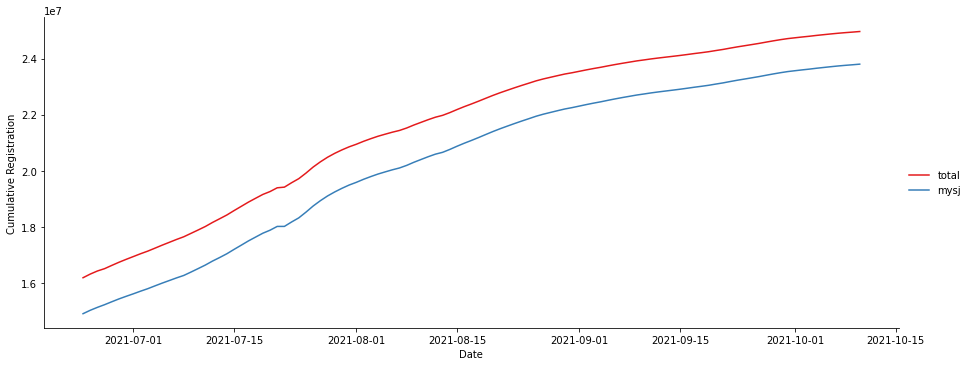

In [16]:
ax = sns.relplot(data=analysis.loc[:,['total', 'mysj']], kind='line',
            aspect=2.5, dashes=False, palette='Set1')
#ax.axhline(population['pop'][0], ls='--', linewidth=3, color='red')
# ax = ax.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'COUNT')
#ax.refline(y=population['pop'][0])

#ax.axhline()

ax.set_xlabels('Date')
ax.set_ylabels('Cumulative Registration')

In [17]:
analysis.head()

,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
date,,,,,,,,,,
2021-06-24,Malaysia,16191488,5219793,14910368,10668,1270452,776980,2787690,3938517,298917
2021-06-25,Malaysia,16321185,5253580,15031571,10779,1278835,797921,2802744,3964444,301849
2021-06-26,Malaysia,16431724,5282795,15136062,10892,1284770,815984,2815665,3986607,304571
2021-06-27,Malaysia,16515196,5304420,15231554,10808,1272834,830643,2824735,4003420,306740
2021-06-28,Malaysia,16630764,5333905,15335726,10933,1284105,842985,2835474,4027560,309623


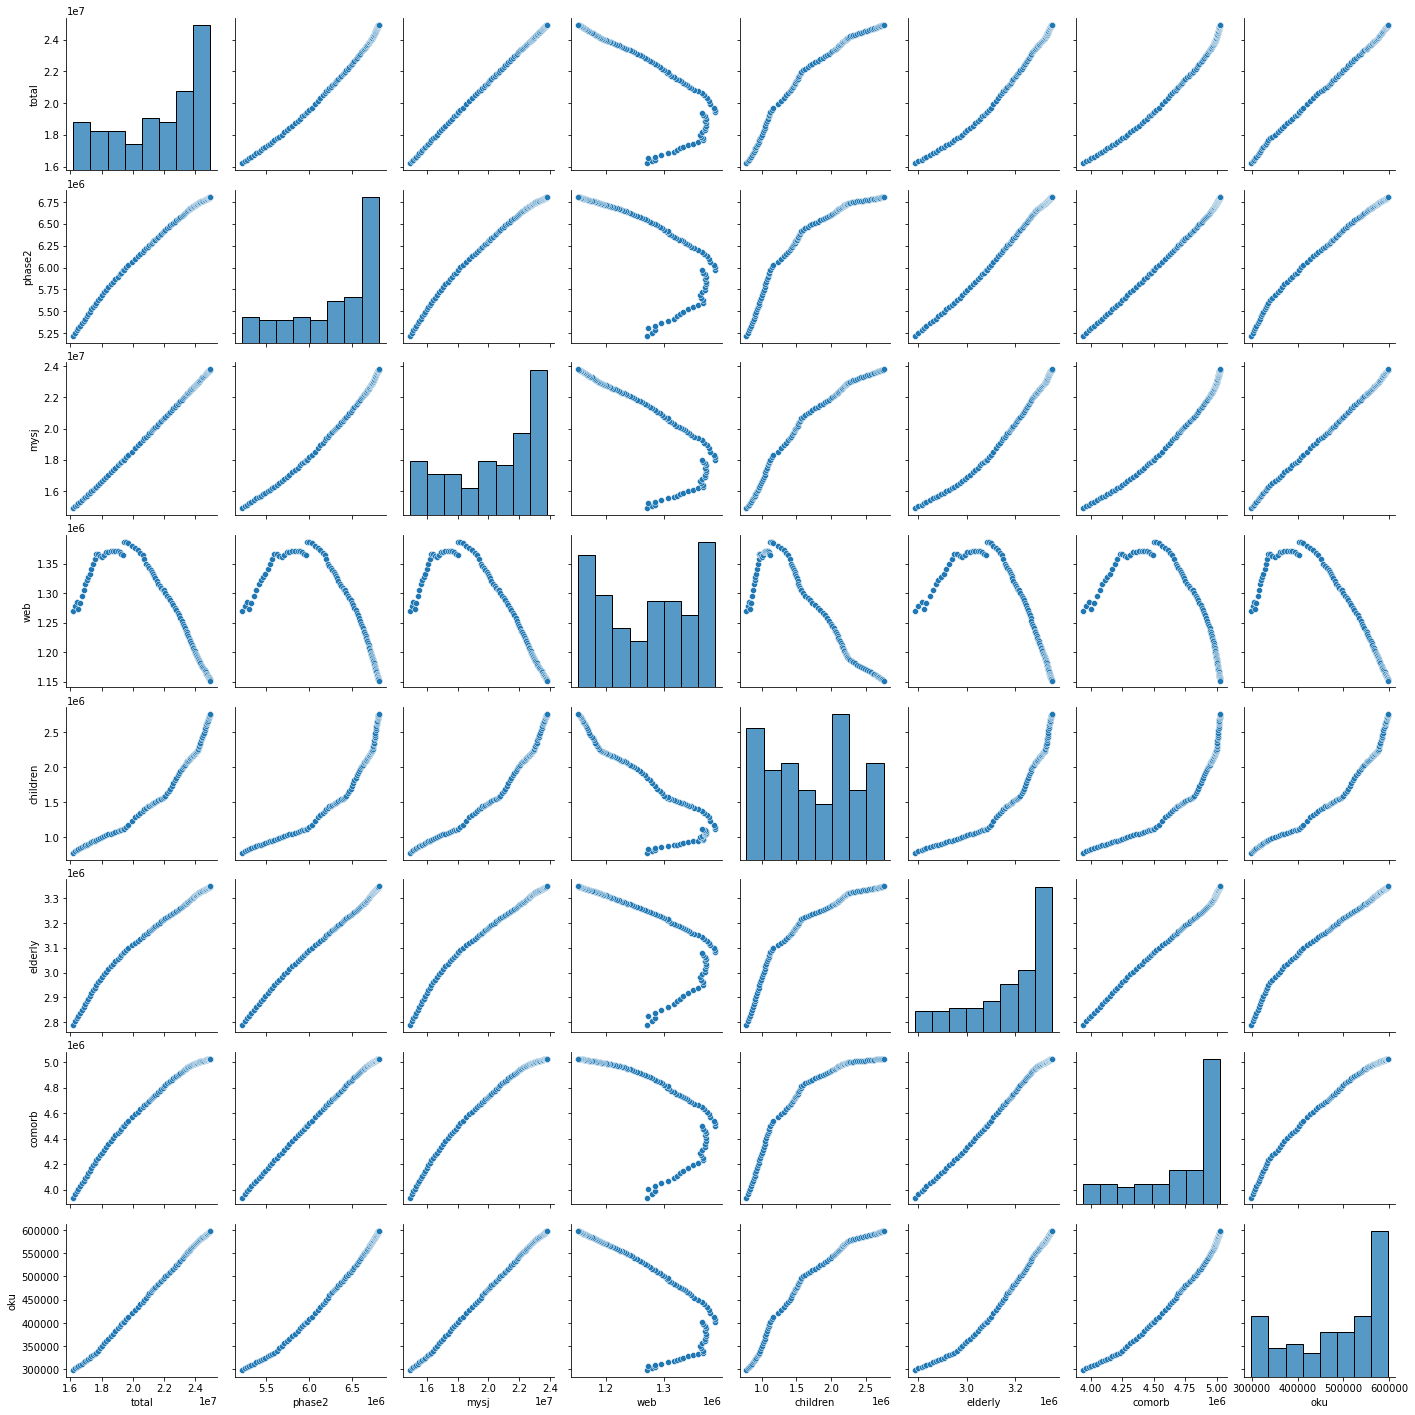

In [18]:
sns.pairplot(data=analysis[['state', 'total', 'phase2', 'mysj', 'web', 'children', 'elderly', 'comorb', 'oku']])

In [19]:
# https://stackoverflow.com/questions/39479919/how-do-i-subtract-the-previous-row-from-the-current-row-in-a-pandas-dataframe-an
analysis['daily_reg'] = analysis['total'].diff()
analysis['7_rolling_avg'] = analysis['daily_reg'].rolling(7).mean()

In [20]:
analysis.dropna(inplace=True)

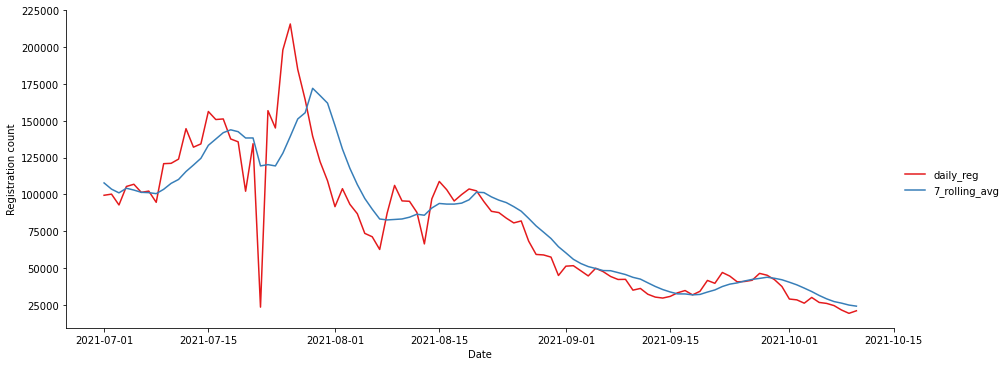

In [21]:
ax = sns.relplot(data=analysis.loc[:,['daily_reg', '7_rolling_avg']], kind='line',
            aspect=2.5, dashes=False, palette='Set1')
#ax.axhline(population['pop'][0], ls='--', linewidth=3, color='red')
# ax = ax.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'COUNT')
#ax.refline(y=population['pop'][0])

#ax.axhline()
ax.set_xlabels('Date')
ax.set_ylabels('Registration count')

There's a significant drop around late July 2021 for the registration, though the number spikes back up few days after. We are unable to ascertain why, but we assume there might be a downtime or significant deduplication happening during that time period.

<AxesSubplot:>

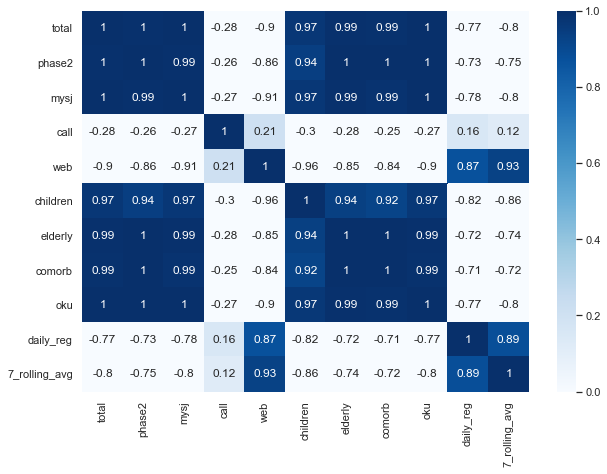

In [22]:
columns_list = analysis.columns
columns_list = columns_list.delete(0)

#analysis.groupby('ID')[['Val1','Val2']].corr()
sns.set(rc={'figure.figsize':(10, 7)})
sns.heatmap(analysis[columns_list].corr(), cmap='Blues', annot=True, vmin=0, vmax=1)

In [23]:
#analysis_recent = vaxreg_malaysia.copy()
analysis_recent = vaxreg_malaysia.iloc[-1:]


analysis_recent = pd.merge(analysis_recent, population[['state', 'pop','pop_18', 'pop_60', 'pop_12']], on='state')
#analysis_recent['pop_18'] = population['pop_18'][0]
#analysis_recent['pop_60'] = population['pop_60'][0]

analysis_recent



,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku,pop,pop_18,pop_60,pop_12
0,2021-10-10,Malaysia,24963595,6807746,23800500,11159,1151936,2759585,3348963,5028523,598069,32657400,23409600,3502000,3147500


5745800 adults

In [24]:


analysis_recent['num_in_between'] = (analysis_recent['total'] - analysis_recent['children'] - analysis_recent['elderly'])
# #analysis_recent['pop_between'] = analysis_recent['pop'] - analysis_recent['pop_18'] - analysis_recent['pop_60']

analysis_recent['percent_children'] = ((analysis_recent['children'] / analysis_recent['pop_12']) * 100).round(2)
analysis_recent['percent_elderly'] = ((analysis_recent['elderly'] / analysis_recent['pop_60']) * 100).round(2)
analysis_recent['percent_adults'] = (((analysis_recent['num_in_between']) / (analysis_recent['pop_18'])) * 100).round(2)

analysis_recent

# ======================
# analysis_recent['num_in_between'] = (analysis_recent['total'] - analysis_recent['children'] - analysis_recent['elderly'])
# #analysis_recent['pop_between'] = analysis_recent['pop'] - analysis_recent['pop_18'] - analysis_recent['pop_60']

# analysis_recent['percent_children'] = ((analysis_recent['children'] / analysis_recent['pop_12']) * 100).round(2)
# analysis_recent['percent_reg_60'] = ((analysis_recent['elderly'] / analysis_recent['pop_60']) * 100).round(2)
# analysis_recent['percent_in_between'] = (((analysis_recent['num_in_between']) / (analysis_recent['pop'] - analysis_recent['pop_18'] - analysis_recent['pop_60'])) * 100).round(2)
# ==================

,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku,pop,pop_18,pop_60,pop_12,num_in_between,percent_children,percent_elderly,percent_adults
0,2021-10-10,Malaysia,24963595,6807746,23800500,11159,1151936,2759585,3348963,5028523,598069,32657400,23409600,3502000,3147500,18855047,87.68,95.63,80.54


<s>WHAT? 328.15% of people between age 18 and 60 registered? Ok lol

Do childrens (<18) somehow got themselves registered as adults? Is there possible duplications that did not get resolved, or immigrants registered for vaccination here in this country counted as such? Latter seems likely, but that implies a huge amount of non-Malaysian registered for the vaccines.

Here we can see that up to 10th October, only 10% of population under 18 years old have registered for the vaccine, and the number seems rather low, considering the phase 4 of Recovery Plan is approaching and [students are expected to come back to the school in November 2021](https://www.thestar.com.my/news/nation/2021/09/12/education-minister-tighter-sop-for-schools-ahead-of-oct-3-reopening)</s>
.
From what we can see, at least more than 80% at each category (children, adults, elderly) have registered for mysejahtera. More than 87% of the children under 18 have registered for the vaccine, which is above the required for herd immunity and ahead of the school reopening time.

24510702
18855047


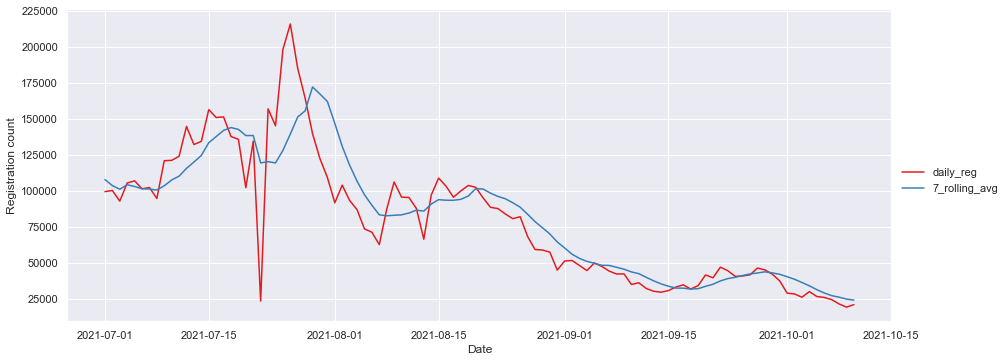

In [25]:
ax = sns.relplot(data=analysis.loc[:,['daily_reg', '7_rolling_avg']], kind='line',
            aspect=2.5, dashes=False, palette='Set1')
#ax.axhline(population['pop'][0], ls='--', linewidth=3, color='red')
# ax = ax.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'COUNT')
#ax.refline(y=population['pop'][0])

#ax.axhline()
ax.set_xlabels('Date')
ax.set_ylabels('Registration count')

In [26]:
analysis_daily = vaxreg_malaysia.copy()
analysis_daily.columns

for x in analysis_daily.columns:
    if x == 'state' or x == 'date':
        continue
    analysis_daily[x] = analysis_daily[x].diff()
    
analysis_daily.dropna(inplace=True)

In [27]:
analysis_daily.head(5)

,date,state,total,phase2,mysj,call,web,children,elderly,comorb,oku
1,2021-06-25,Malaysia,129697.0,33787.0,121203.0,111.0,8383.0,20941.0,15054.0,25927.0,2932.0
2,2021-06-26,Malaysia,110539.0,29215.0,104491.0,113.0,5935.0,18063.0,12921.0,22163.0,2722.0
3,2021-06-27,Malaysia,83472.0,21625.0,95492.0,-84.0,-11936.0,14659.0,9070.0,16813.0,2169.0
4,2021-06-28,Malaysia,115568.0,29485.0,104172.0,125.0,11271.0,12342.0,10739.0,24140.0,2883.0
5,2021-06-29,Malaysia,112131.0,29482.0,101593.0,135.0,10403.0,13005.0,12957.0,22358.0,2930.0


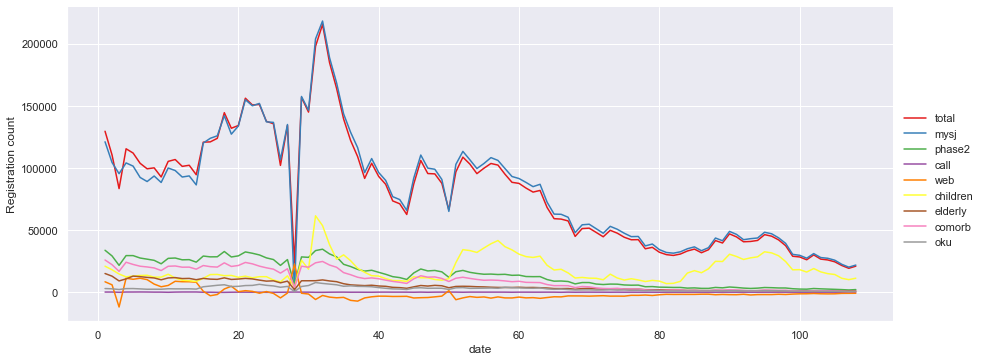

In [28]:
ax = sns.relplot(data=analysis_daily.loc[:,['total', 'mysj', 'phase2', 'call', 'web', 'children', 'elderly', 'comorb', 'oku']], kind='line',
            aspect=2.5, dashes=False, palette='Set1')
#ax.axhline(population['pop'][0], ls='--', linewidth=3, color='red')
# ax = ax.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'COUNT')
#ax.refline(y=population['pop'][0])

#ax.axhline()
ax.set_xlabels('date')
ax.set_ylabels('Registration count')

From this graph, we can see that during the time when the total registration fell down, the number of registration for web increases, although it's only a small amount relative to the dip in mysejahtera registration during that day.

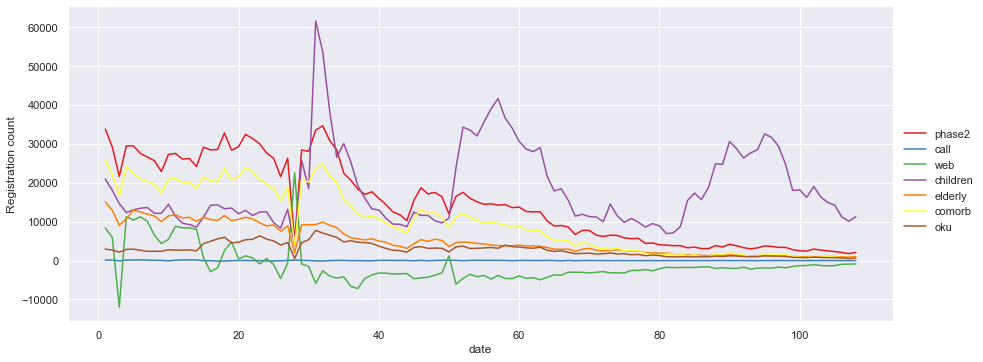

In [29]:
ax = sns.relplot(data=analysis_daily.loc[:,['phase2', 'call', 'web', 'children', 'elderly', 'comorb', 'oku']], kind='line',
            aspect=2.5, dashes=False, palette='Set1')
#ax.axhline(population['pop'][0], ls='--', linewidth=3, color='red')
# ax = ax.map(lambda y, **kw: plt.axhline(y.mean(), color="k"), 'COUNT')
#ax.refline(y=population['pop'][0])

#ax.axhline()
ax.set_xlabels('date')
ax.set_ylabels('Registration count')

We can that from this graph that somehow web registration goes into negative numbers. As noted in `README.md` for registration, MySejahtera has higher priority in the deduplication process, followed by call and then WEB registration. From this, we can assume that a lot of users registered for their vaccines through both MySejahtera and the website, and since the MySejahtera application takes priority over the web, a lot of web registration got deleted in the process.

In [30]:
vax_state.head()

,date,state,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
0,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Kedah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Kelantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Melaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Negeri Sembilan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

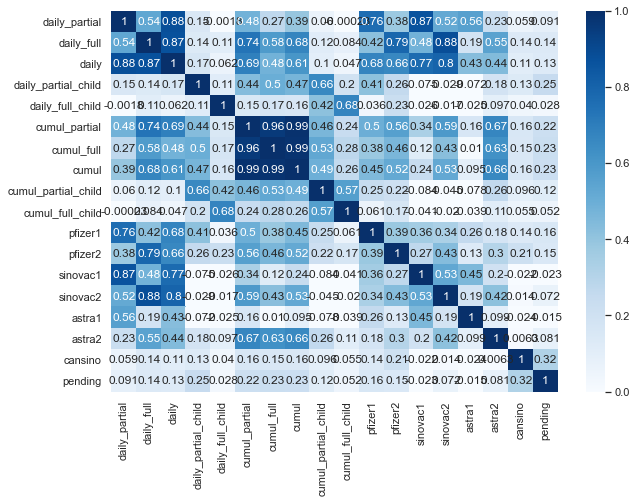

In [31]:
analysis = vax_state.copy()
columns_list = analysis.columns
columns_list = columns_list.delete(0)

#analysis.groupby('ID')[['Val1','Val2']].corr()
sns.set(rc={'figure.figsize':(10, 7)})
sns.heatmap(analysis[columns_list].corr(), cmap='Blues', annot=True, vmin=0, vmax=1)

## For vaccination doses per state

First, we would look at the cumulative doses given in each state, sorted by descending order

In [32]:
df_trim = vax_state.iloc[-16:]
df_trim = df_trim.sort_values('cumul', ascending=False)

<AxesSubplot:xlabel='cumul', ylabel='state'>

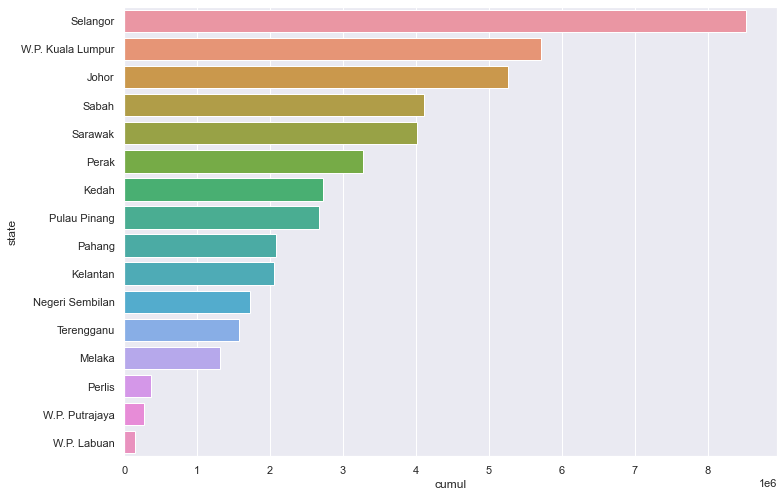

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df_trim, x='cumul', y='state', orient='h')

From here, we can see that Selangor has the most vaccine dose given compared all of the states

In [34]:
states_pop = population.iloc[-16:]

In [35]:
df_temp = pd.merge(df_trim, population[['state', 'pop','pop_18', 'pop_60', 'pop_12']], on='state')
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html
df_temp['perc_vax'] = (df_temp['cumul_partial'] / df_temp['pop'] * 100).round(2)

In [36]:
# df_temp['cumul_partial_perc'] = (df_temp['cumul_partial'] / df_temp['pop'] * 100).round(2)
# df_temp['cumul-partial_child'] = (df_temp[''])

In [37]:
df_temp

,date,state,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,...,sinovac2,astra1,astra2,cansino,pending,pop,pop_18,pop_60,pop_12,perc_vax
0,2021-10-11,Selangor,24345,7278,31623,22968,2756,4474805,4053428,8525036,...,1706,0,0,194,1473,6538000,4747900,575800,569100,68.44
1,2021-10-11,W.P. Kuala Lumpur,2489,1736,4225,1969,777,2958692,2751282,5709635,...,298,0,23,0,47,1773700,1348600,205800,140800,166.81
2,2021-10-11,Johor,2659,20784,23443,810,6050,2848071,2412637,5257493,...,2719,0,7012,3,136,3781000,2711900,428700,359900,75.33
3,2021-10-11,Sabah,5126,33040,38166,1479,19868,2275277,1919820,4115435,...,370,4,3885,364,230,3908500,2758400,238900,434000,58.21
4,2021-10-11,Sarawak,742,1302,2044,585,927,2103529,1914174,4017516,...,258,0,0,21,11,2816500,2042700,332800,293200,74.69
5,2021-10-11,Perak,1911,15312,17223,592,3927,1774731,1509584,3277334,...,459,23,6898,113,928,2510300,1862700,397300,237200,70.70
6,2021-10-11,Kedah,1423,13891,15314,477,4300,1472960,1249363,2719111,...,97,0,6357,61,115,2185100,1540600,272500,211400,67.41
7,2021-10-11,Pulau Pinang,2038,8965,11003,918,211,1440871,1240347,2677717,...,922,0,5869,4,210,1773600,1367200,239200,141500,81.24
8,2021-10-11,Pahang,822,9202,10024,306,6299,1127255,957918,2082214,...,44,1,1157,216,50,1678700,1175800,190200,173000,67.15
9,2021-10-11,Kelantan,2445,9704,12149,1491,4455,1133992,926585,2058333,...,1077,0,2013,9,48,1906700,1236200,194100,210600,59.47


Note that <code>cumul_partial</code> is used to count the number of _unique individuals_ who have been vaccinated, which compromises people who received 1 dose of a double-dose vaccine (such as Pfizer, Sinovac, AstraZec), and those who received a single-dose vaccine (cansino).  

Text(0.5, 1.0, 'Numbers of invidual that has been vaccinated (partial/complete)')

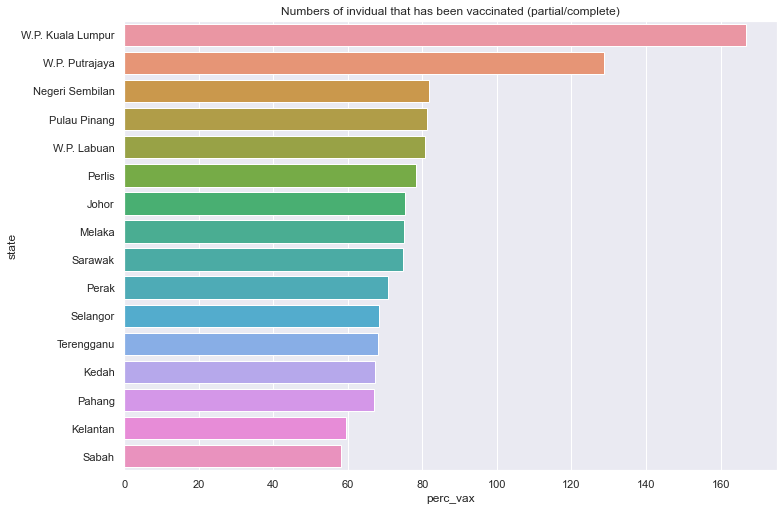

In [38]:
df_temp = df_temp.sort_values('perc_vax', ascending=False)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=df_temp, x='perc_vax', y='state', orient='h')
ax.set_title('Numbers of invidual that has been vaccinated (partial/complete)')

From this bar chart, we can see that more than 100% of the population in W.P. Kuala Lumpur have gotten their vaccines. We assumed that people from different states may have taken their vaccines in Kuala Lumpur during the vaccination drive.

### Vaccination Progress

#### Vaccination Progress for Malaysia

In [39]:
df_trim = vax_malaysia.iloc[-1:]
df_trim = df_trim.sort_values('cumul', ascending=False)

df_trim['pop'] = population['pop'][0]
df_trim

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,pop
229,2021-10-11,52302,132184,184486,38637,51309,24510702,21437380,45835200,2310495,283023,48284,83066,2244,8281,89,38064,1022,3436,32657400


Calculate the percentages of population having vaccinated at least once

In [40]:
df_trim['percent_complete_part'] = ((df_trim['cumul_partial'] / df_trim['pop']) * 100).round(2)
df_trim['percent_incomplete_part'] = 100 - df_trim['percent_complete_part']
df_trim['place'] = 'Malaysia'

<AxesSubplot:xlabel='place'>

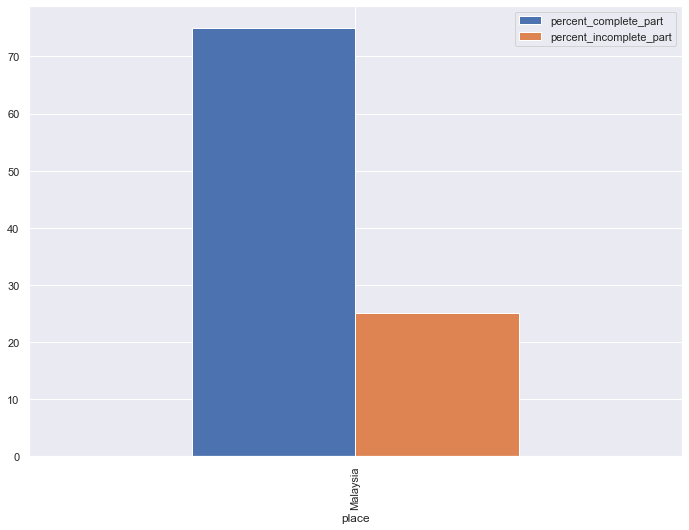

In [41]:
df_trim.plot(x="place", y=["percent_complete_part", "percent_incomplete_part"], kind="bar")

#### Here we can see that by 11th Oct 2021, about 3/4 of the Malaysian population have at least gotten their first vaccine. 

In [42]:
df_trim

,date,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,...,sinovac1,sinovac2,astra1,astra2,cansino,pending,pop,percent_complete_part,percent_incomplete_part,place
229,2021-10-11,52302,132184,184486,38637,51309,24510702,21437380,45835200,2310495,...,2244,8281,89,38064,1022,3436,32657400,75.05,24.95,Malaysia


In [43]:
df_trim['percent_complete_full'] = ((df_trim['cumul_full'] / df_trim['pop']) * 100).round(2)
df_trim['percent_incomplete_full'] = 100 - df_trim['percent_complete_full']

<AxesSubplot:xlabel='place'>

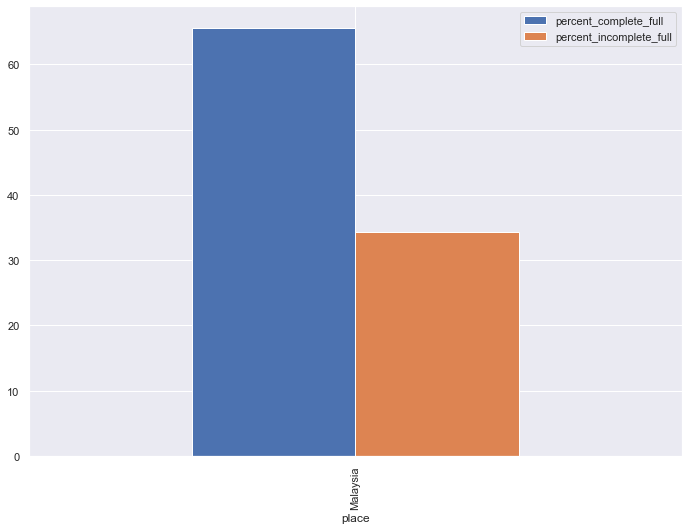

In [44]:
df_trim.plot(x="place", y=["percent_complete_full", "percent_incomplete_full"], kind="bar")

By this date, roughly 66% of people have completed their vaccination dose.

In [45]:
analysis = vax_state.copy()

In [46]:
analysis

,date,state,daily_partial,daily_full,daily,daily_partial_child,daily_full_child,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending
0,2021-02-24,Johor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Kedah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Kelantan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Melaka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Negeri Sembilan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,2021-10-11,Selangor,24345,7278,31623,22968,2756,4474805,4053428,8525036,300881,9493,22625,5301,324,1706,0,0,194,1473
3676,2021-10-11,Terengganu,3430,4010,7440,2977,98,855964,716052,1568099,113182,3806,3401,1444,26,58,0,2448,0,63
3677,2021-10-11,W.P. Kuala Lumpur,2489,1736,4225,1969,777,2958692,2751282,5709635,128255,3596,2234,1398,225,298,0,23,0,47
3678,2021-10-11,W.P. Labuan,81,76,157,14,16,80416,70252,150668,8062,2311,80,75,1,1,0,0,0,0


state
Johor                AxesSubplot(0.125,0.125;0.775x0.755)
Kedah                AxesSubplot(0.125,0.125;0.775x0.755)
Kelantan             AxesSubplot(0.125,0.125;0.775x0.755)
Melaka               AxesSubplot(0.125,0.125;0.775x0.755)
Negeri Sembilan      AxesSubplot(0.125,0.125;0.775x0.755)
Pahang               AxesSubplot(0.125,0.125;0.775x0.755)
Perak                AxesSubplot(0.125,0.125;0.775x0.755)
Perlis               AxesSubplot(0.125,0.125;0.775x0.755)
Pulau Pinang         AxesSubplot(0.125,0.125;0.775x0.755)
Sabah                AxesSubplot(0.125,0.125;0.775x0.755)
Sarawak              AxesSubplot(0.125,0.125;0.775x0.755)
Selangor             AxesSubplot(0.125,0.125;0.775x0.755)
Terengganu           AxesSubplot(0.125,0.125;0.775x0.755)
W.P. Kuala Lumpur    AxesSubplot(0.125,0.125;0.775x0.755)
W.P. Labuan          AxesSubplot(0.125,0.125;0.775x0.755)
W.P. Putrajaya       AxesSubplot(0.125,0.125;0.775x0.755)
Name: cumul_partial, dtype: object

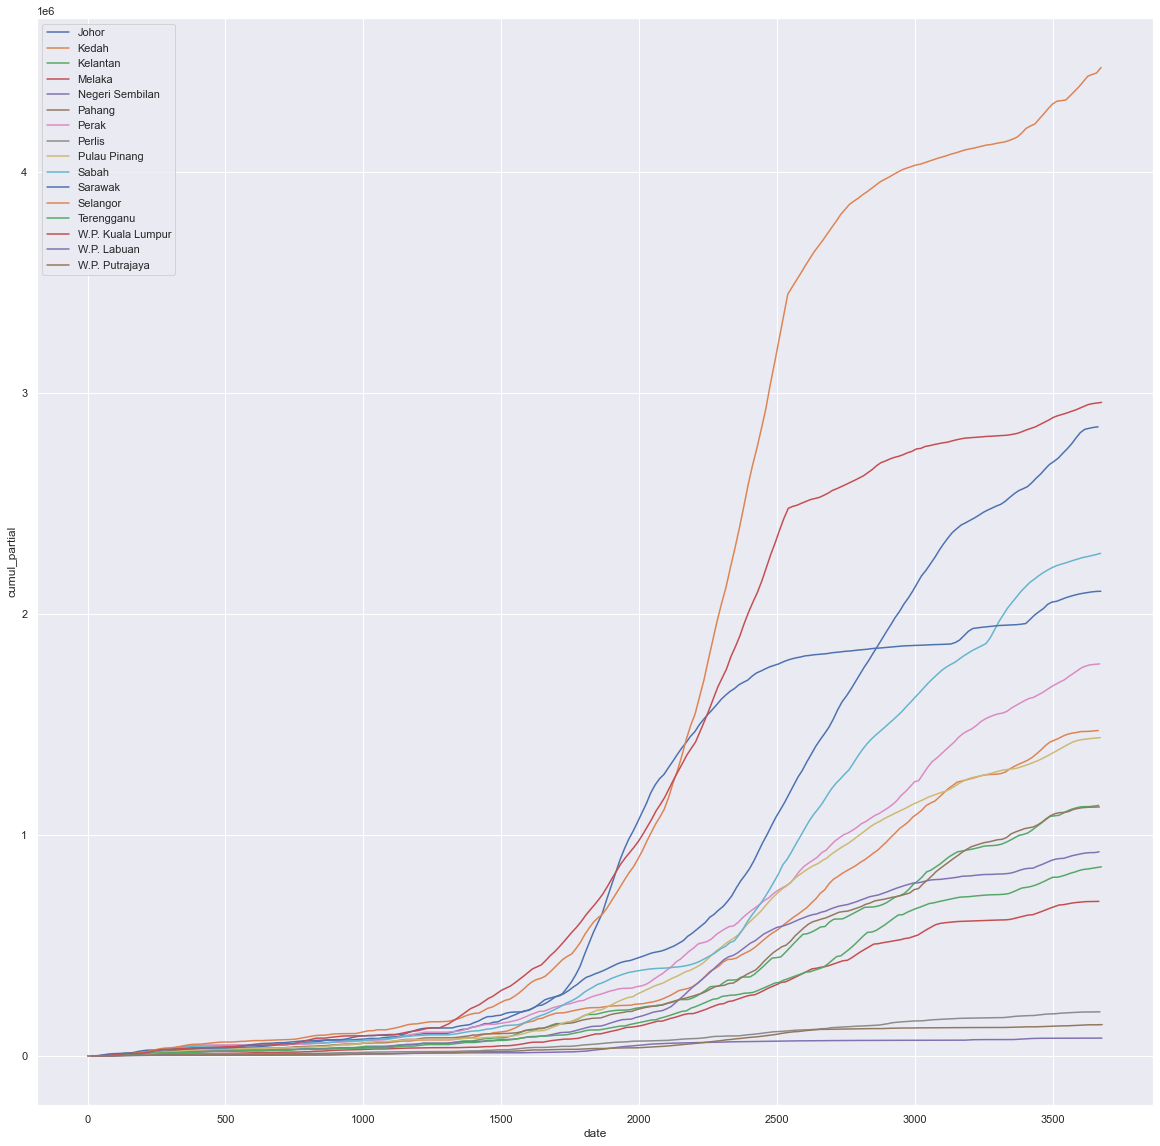

In [47]:
plt.figure(figsize=(20, 20))
#analysis.set_index("date", inplace=True)
analysis.groupby("state")["cumul_partial"].plot(legend=True, xlabel="date", ylabel="cumul_partial")

state
Johor                AxesSubplot(0.125,0.125;0.775x0.755)
Kedah                AxesSubplot(0.125,0.125;0.775x0.755)
Kelantan             AxesSubplot(0.125,0.125;0.775x0.755)
Melaka               AxesSubplot(0.125,0.125;0.775x0.755)
Negeri Sembilan      AxesSubplot(0.125,0.125;0.775x0.755)
Pahang               AxesSubplot(0.125,0.125;0.775x0.755)
Perak                AxesSubplot(0.125,0.125;0.775x0.755)
Perlis               AxesSubplot(0.125,0.125;0.775x0.755)
Pulau Pinang         AxesSubplot(0.125,0.125;0.775x0.755)
Sabah                AxesSubplot(0.125,0.125;0.775x0.755)
Sarawak              AxesSubplot(0.125,0.125;0.775x0.755)
Selangor             AxesSubplot(0.125,0.125;0.775x0.755)
Terengganu           AxesSubplot(0.125,0.125;0.775x0.755)
W.P. Kuala Lumpur    AxesSubplot(0.125,0.125;0.775x0.755)
W.P. Labuan          AxesSubplot(0.125,0.125;0.775x0.755)
W.P. Putrajaya       AxesSubplot(0.125,0.125;0.775x0.755)
Name: daily_partial, dtype: object

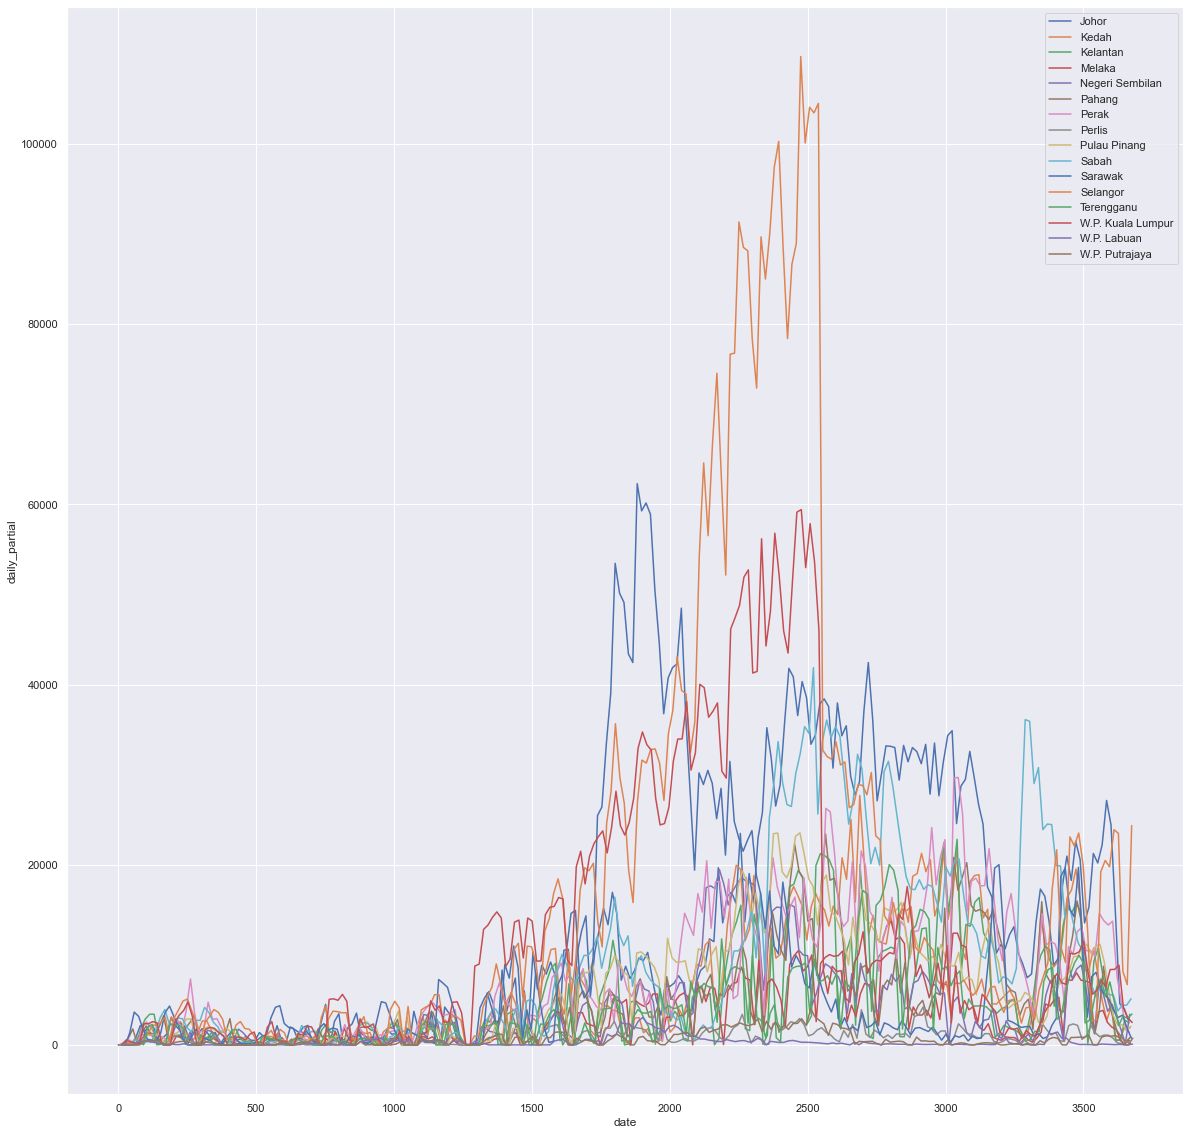

In [48]:
plt.figure(figsize=(20, 20))
#analysis.set_index("date", inplace=True)
analysis.groupby("state")["daily_partial"].plot(legend=True, xlabel="date", ylabel="daily_partial")

We can there's a huge jump of vaccination given out around ~~ before going down at Selangor. For most of the other states, the vaccinations given daily is roughly around 20000.